Importando bibliotecas para o projeto

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics



Fase de coleta e pré-processamento dos dados do projeto:

In [3]:
dados = pd.read_csv('consumo_cerveja.csv', sep=';')

In [4]:
dados.head()

,data,temperatura_media,temperatura_minima,temperatura_maxima,precipitacao,fds,consumo_litros
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [5]:
dados.shape

(365, 7)

In [6]:
dados.describe().round(2)

,temperatura_media,temperatura_minima,temperatura_maxima,precipitacao,fds,consumo_litros
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [7]:
dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')
dados.corr(method='pearson').round(4)

,data,temperatura_media,temperatura_minima,temperatura_maxima,precipitacao,fds,consumo_litros
data,1.0000,-0.0986,-0.1701,-0.0689,0.0075,-0.0060,0.0435
temperatura_media,-0.0986,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temperatura_minima,-0.1701,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temperatura_maxima,-0.0689,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
precipitacao,0.0075,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0060,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo_litros,0.0435,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


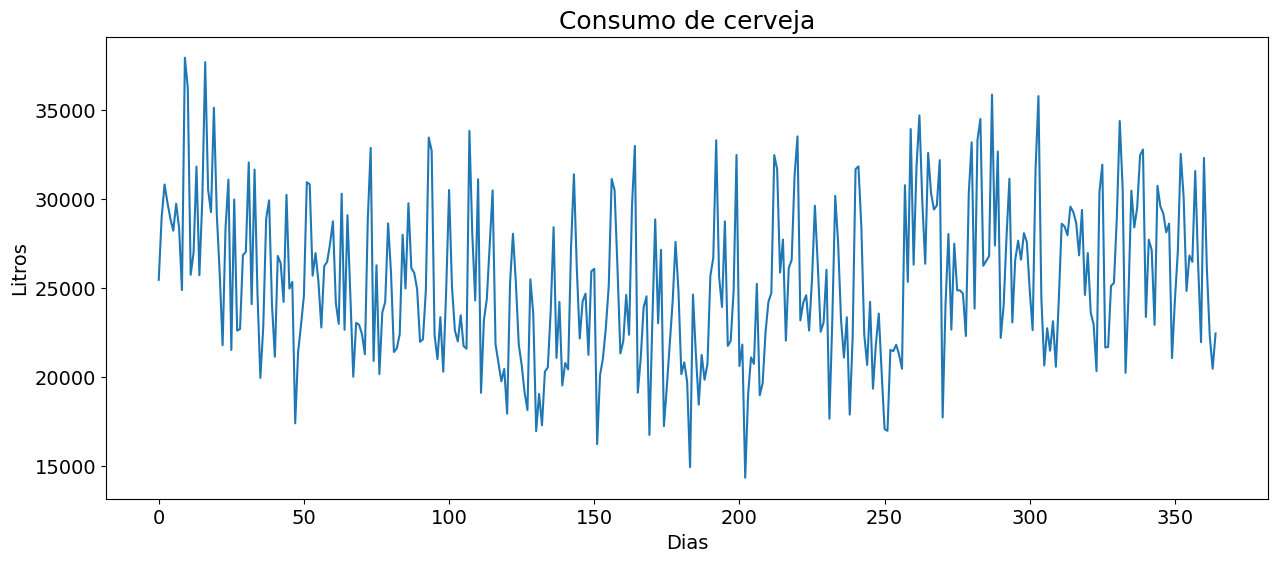

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.set_title('Consumo de cerveja', fontsize=18)
ax.set_ylabel('Litros', fontsize=14)
ax.set_xlabel('Dias', fontsize=14)
ax = dados['consumo_litros'].plot(fontsize=14)

<Axes: title={'center': 'Consumo de cerveja'}, ylabel='Litros'>

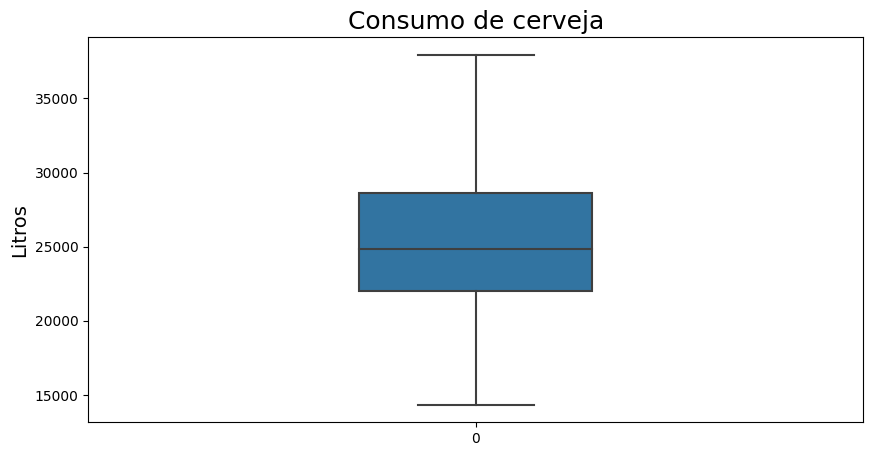

In [9]:
ax = sns.boxplot(data=dados['consumo_litros'], width=0.3)
ax.figure.set_size_inches(10, 5)
ax.set_title('Consumo de cerveja', fontsize=18)
ax.set_ylabel('Litros', fontsize=14)
ax

In [20]:
sns.set_palette('bright')
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

<Axes: title={'center': 'Consumo de cerveja'}, xlabel='Final de semana', ylabel='Litros'>

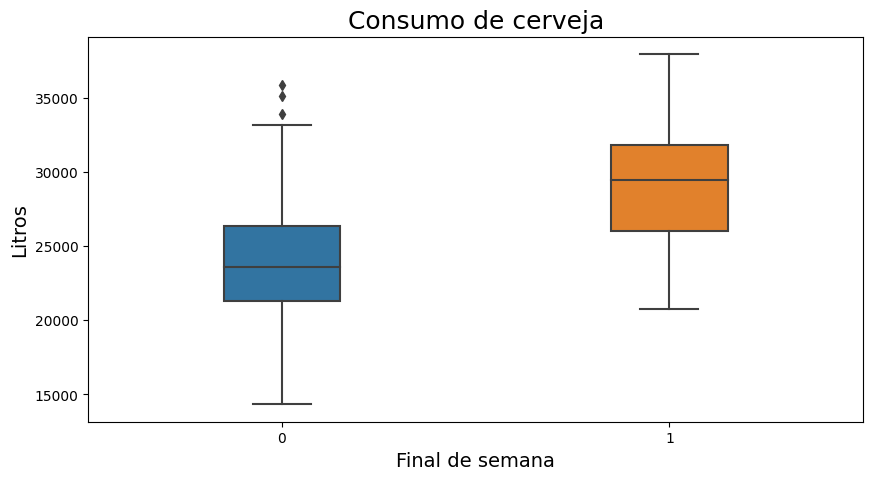

In [10]:
ax = sns.boxplot(y='consumo_litros', x='fds', data=dados, width=0.3)
ax.figure.set_size_inches(10, 5)
ax.set_title('Consumo de cerveja', fontsize=18)
ax.set_ylabel('Litros', fontsize=14)
ax.set_xlabel('Final de semana', fontsize=14)
ax


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Consumo', ylabel='Consumo de cerveja (L)'>

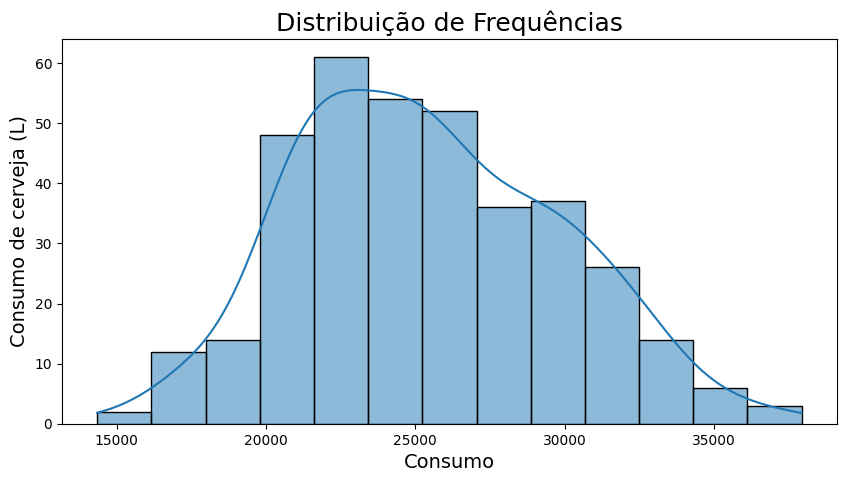

In [11]:
ax = sns.histplot(data=dados['consumo_litros'], kde=True)
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição de Frequências', fontsize=18)
ax.set_ylabel('Consumo de cerveja (L)', fontsize=14)
ax.set_xlabel('Consumo', fontsize=14)
ax

In [15]:
variaveis = dados.drop(columns=['data', 'consumo_litros'])
variaveis.columns.tolist()

['temperatura_media',
 'temperatura_minima',
 'temperatura_maxima',
 'precipitacao',
 'fds']

c:\Users\pgdel\Desktop\SENACRS\4º Semestre\Inteligência Artificial\Projetos\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


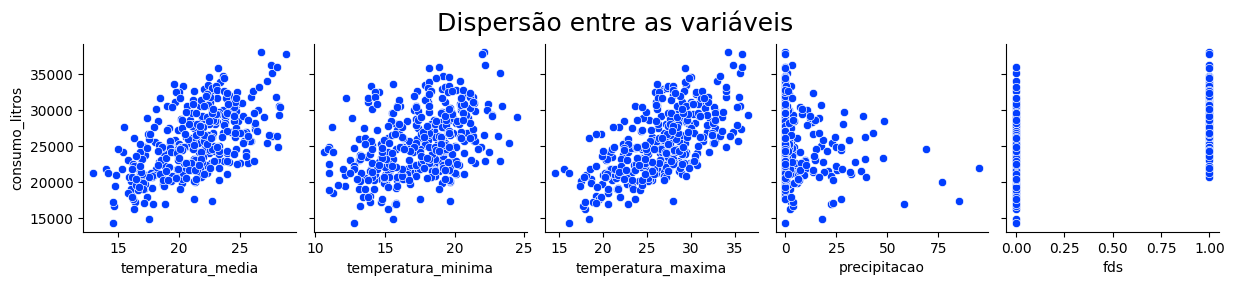

In [23]:
ax = sns.pairplot(
    dados,
    y_vars='consumo_litros',
    x_vars=variaveis.columns.tolist(),
    kind='scatter')

ax.fig.suptitle('Dispersão entre as variáveis', fontsize=18, y=1.1)
ax

c:\Users\pgdel\Desktop\SENACRS\4º Semestre\Inteligência Artificial\Projetos\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


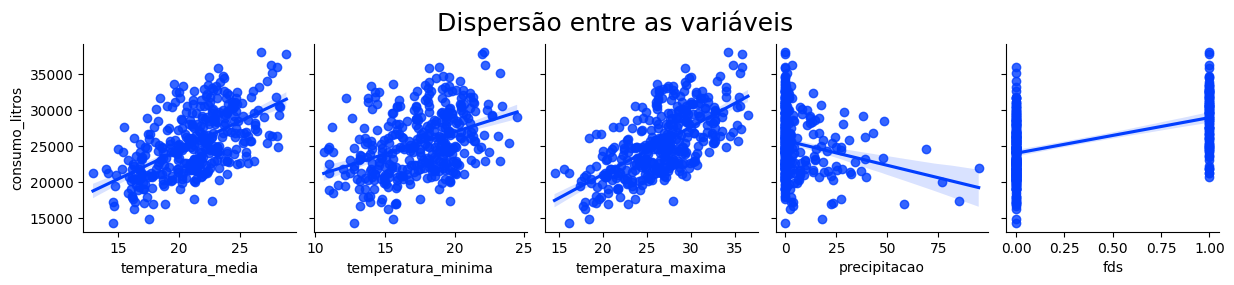

In [24]:
ax = sns.pairplot(
    dados,
    y_vars='consumo_litros',
    x_vars=variaveis.columns.tolist(),
    kind='reg')

ax.fig.suptitle('Dispersão entre as variáveis', fontsize=18, y=1.1)
ax

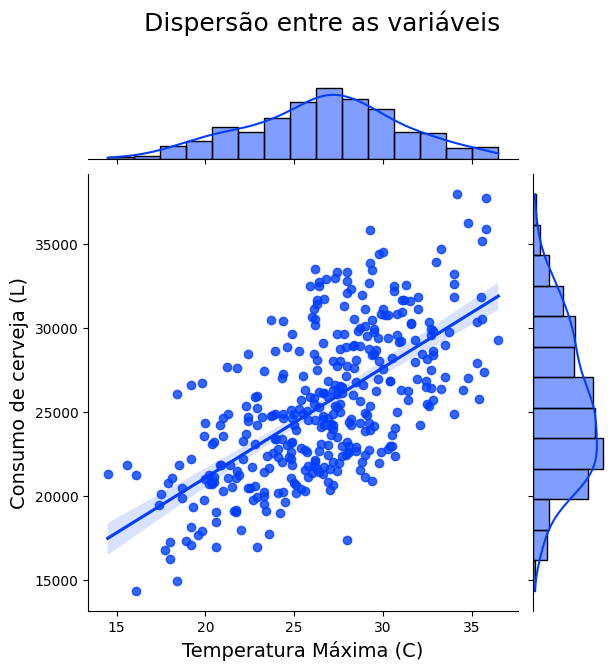

In [25]:
ax = sns.jointplot(x='temperatura_maxima', y='consumo_litros', data=dados, kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=18, y=1.1)
ax.set_axis_labels('Temperatura Máxima (C)', 'Consumo de cerveja (L)', fontsize=14)

c:\Users\pgdel\Desktop\SENACRS\4º Semestre\Inteligência Artificial\Projetos\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


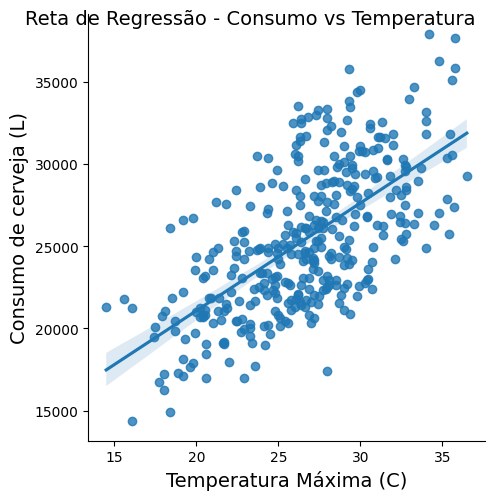

In [19]:
ax = sns.lmplot(x='temperatura_maxima', y='consumo_litros', data=dados)
ax.fig.suptitle('Reta de Regressão - Consumo vs Temperatura', fontsize=14)
ax.set_axis_labels('Temperatura Máxima (C)', 'Consumo de cerveja (L)', fontsize=14)
ax

c:\Users\pgdel\Desktop\SENACRS\4º Semestre\Inteligência Artificial\Projetos\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


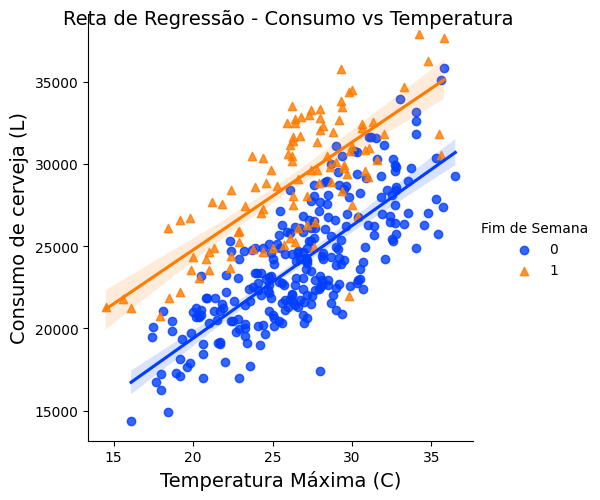

In [26]:
ax =sns.lmplot(
    x='temperatura_maxima',
    y='consumo_litros',
    data=dados,
    hue='fds',
    markers=['o', '^'],
    legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo vs Temperatura', fontsize=14)
ax.set_axis_labels('Temperatura Máxima (C)', 'Consumo de cerveja (L)', fontsize=14)
ax.add_legend(title='Fim de Semana')
ax

c:\Users\pgdel\Desktop\SENACRS\4º Semestre\Inteligência Artificial\Projetos\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


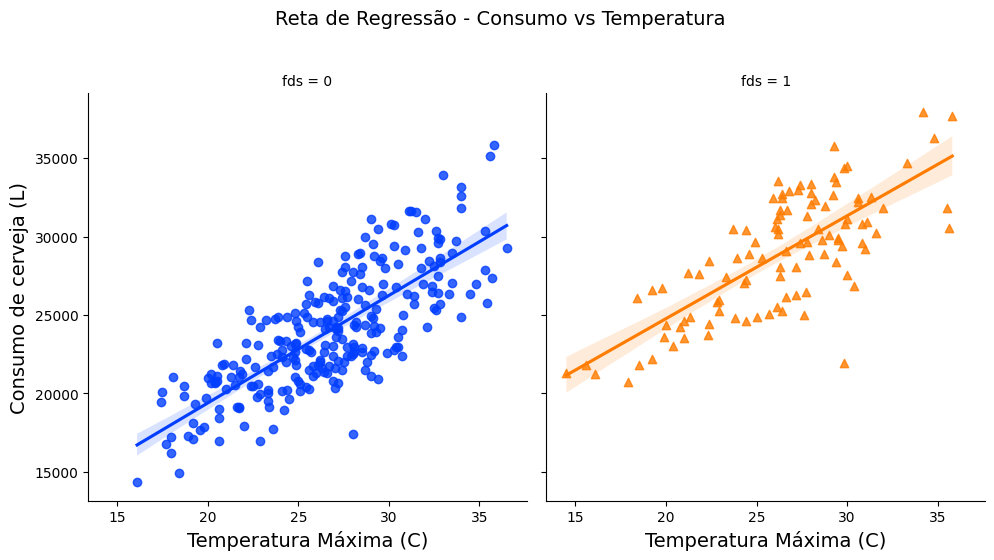

In [28]:
ax = sns.lmplot(
    x='temperatura_maxima',
    y='consumo_litros',
    data=dados,
    hue='fds',
    markers=['o', '^'],
    col='fds')
ax.fig.suptitle('Reta de Regressão - Consumo vs Temperatura', fontsize=14, y=1.1)
ax.set_axis_labels('Temperatura Máxima (C)', 'Consumo de cerveja (L)', fontsize=14)
ax

In [29]:
y = dados['consumo_litros']

In [30]:
X = dados[['temperatura_maxima', 'precipitacao', 'fds']]

In [31]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
print(
    X_treino.shape,
    X_teste.shape,
    y_treino.shape,
    y_teste.shape,
    (X_treino.shape[0] + X_teste.shape[0])
)

(255, 3) (110, 3) (255,) (110,) 365


In [33]:
modelo = LinearRegression()

In [34]:
modelo.fit(X_treino, y_treino)

LinearRegression()

In [35]:
rDois = modelo.score(X_treino, y_treino).round(2)

print(
    f'R² = {rDois}')

R² = 0.71


In [36]:
y_pred = modelo.predict(X_teste)

In [37]:
rDoisTeste = metrics.r2_score(y_teste,y_pred).round(2)

print(
    'R² = %s' % rDoisTeste
)

R² = 0.75


In [38]:
entrada = X_teste[0:1]
entrada

,temperatura_maxima,precipitacao,fds
193,28.7,0.0,0


In [39]:
print(
    f'Previsão: {modelo.predict(entrada)[0].round(2)}'
)

Previsão: 25554.14


In [52]:
entradaSimulada = {
    'temperatura_maxima': [18.5],
    'precipitacao': [12.1],
    'fds': [1]
}

entradaSimulada = pd.DataFrame(entradaSimulada)
entradaSimulada

,temperatura_maxima,precipitacao,fds
0,18.5,12.1,1


In [53]:
print(
    'Previsão: {0:.2f}'.format(modelo.predict(entradaSimulada)[0])
)

Previsão: 23438.37


In [43]:
modelo.intercept_

6396.174228697255

In [44]:
modelo.coef_

array([ 667.524992  ,  -53.05718063, 5334.97184259])

In [45]:
cabecalho = ['Intercepto', 'Temperatura Máxima', 'Precipitação', 'Final de semana']

pd.DataFrame(
    data=np.append(modelo.intercept_, modelo.coef_),
    index=cabecalho,
    columns=['Parâmetros']
)

,Parâmetros
Intercepto,6396.174229
Temperatura Máxima,667.524992
Precipitação,-53.057181
Final de semana,5334.971843


In [46]:
y_pred_treino = modelo.predict(X_treino)

<Axes: title={'center': 'Previsão x Real'}, xlabel='Litro - Real', ylabel='Litro - Previsão'>

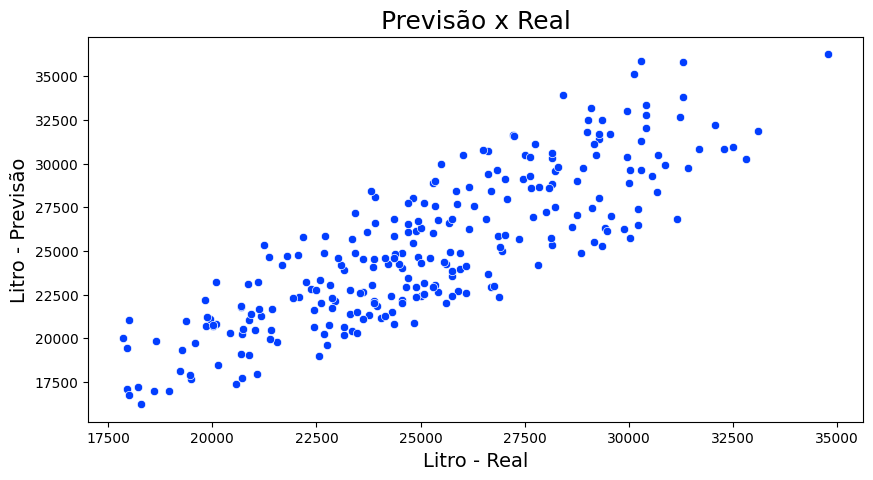

In [47]:
ax = sns.scatterplot(x=y_pred_treino, y=y_treino)
ax.figure.set_size_inches(10, 5)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_ylabel('Litro - Previsão', fontsize=14)
ax.set_xlabel('Litro - Real', fontsize=14)
ax

In [48]:
residuo = y_treino - y_pred_treino
residuo

268    2801.916994
231   -1824.664072
157    1277.699138
19     4998.770364
147    2895.748882
          ...     
71    -2871.339016
106    -852.621893
270   -2975.608727
348     538.234756
102    -931.566523
Name: consumo_litros, Length: 255, dtype: float64

<Axes: title={'center': 'Resíduo x Previsão'}, xlabel='Consumo - Previsão', ylabel='Resíduo'>

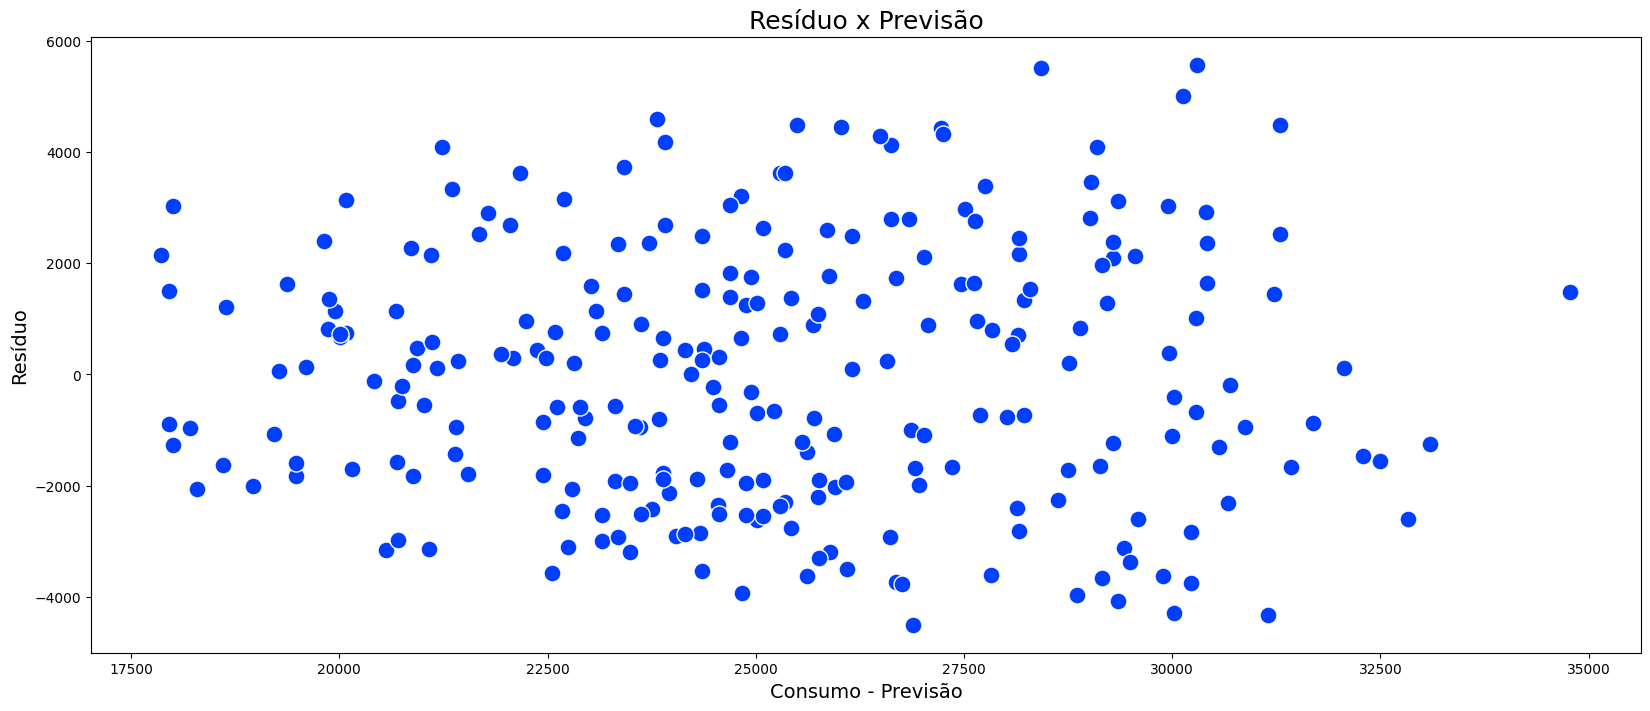

In [49]:
ax = sns.scatterplot(x=y_pred_treino, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduo x Previsão', fontsize=18)
ax.set_ylabel('Resíduo', fontsize=14)
ax.set_xlabel('Consumo - Previsão', fontsize=14)
ax

<Axes: title={'center': 'Resíduo x Previsão'}, xlabel='Consumo - Previsão', ylabel='Resíduo ao quadrado'>

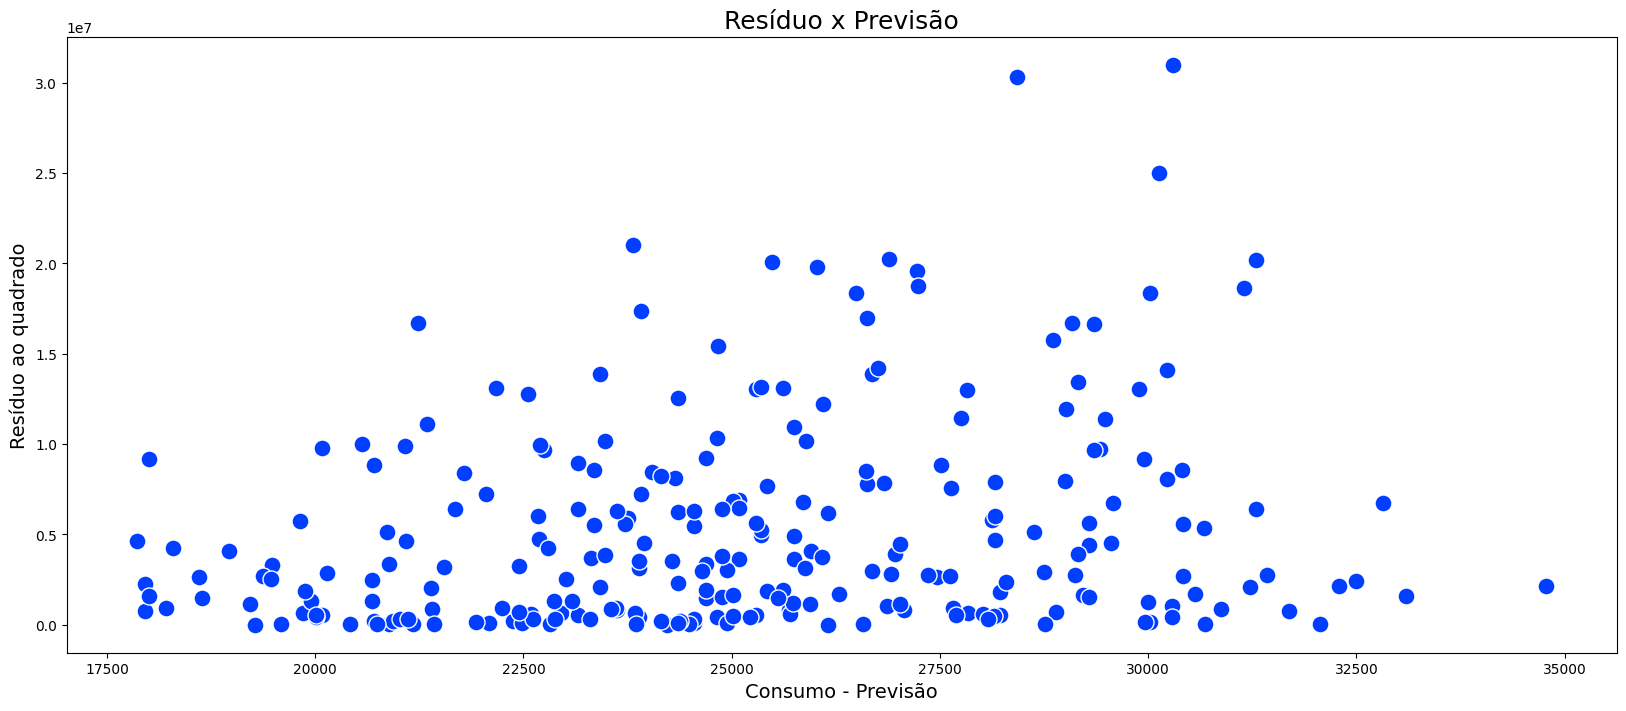

In [50]:
ax = sns.scatterplot(x=y_pred_treino, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduo x Previsão', fontsize=18)
ax.set_ylabel('Resíduo ao quadrado', fontsize=14)
ax.set_xlabel('Consumo - Previsão', fontsize=14)
ax

<Axes: title={'center': 'Distribuição de Frequências - Resíduos'}, xlabel='Litros', ylabel='Count'>

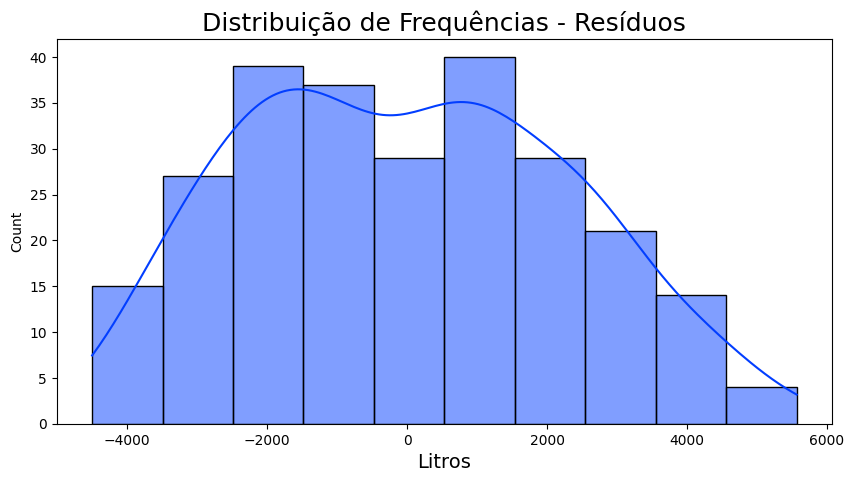

In [51]:
ax = sns.histplot(residuo,kde=True)
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição de Frequências - Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax